<a href="https://colab.research.google.com/github/rahmani3101/Machine-Learning-/blob/main/Decision%20Tree%20Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap

# 1. Load the dataset

In [2]:
data = {
    'Hours': [2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7],
    'Scores': [21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85],
    'Result': ['Fail', 'Pass', 'Fail', 'Pass', 'Fail', 'Fail', 'Pass', 'Pass', 'Pass', 'Fail', 'Pass']
}

In [3]:
df = pd.DataFrame(data)

In [4]:
df['Result'] = df['Result'].map({'Fail': 0, 'Pass': 1})

In [5]:
print("Dataset:\n", df)

Dataset:
     Hours  Scores  Result
0     2.5      21       0
1     5.1      47       1
2     3.2      27       0
3     8.5      75       1
4     3.5      30       0
5     1.5      20       0
6     9.2      88       1
7     5.5      60       1
8     8.3      81       1
9     2.7      25       0
10    7.7      85       1


# 2. Visualize the dataset

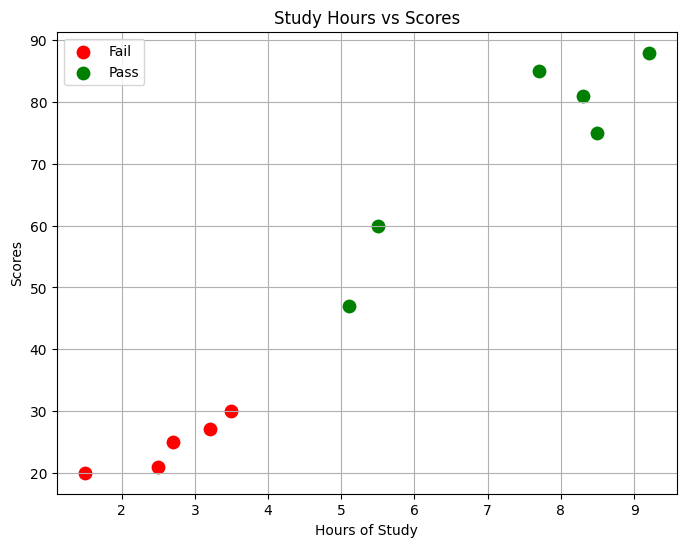

In [6]:
plt.figure(figsize=(8,6))
for result, color in zip([0,1], ['red','green']):
    subset = df[df['Result'] == result]
    plt.scatter(subset['Hours'], subset['Scores'], color=color, label='Pass' if result==1 else 'Fail', s=80)
plt.title('Study Hours vs Scores')
plt.xlabel('Hours of Study')
plt.ylabel('Scores')
plt.legend()
plt.grid(True)
plt.show()

# 3. Split the dataset

In [7]:
X = df[['Hours', 'Scores']]
y = df['Result']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Train Decision Tree Classifier

In [9]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

# 5. Predict test set results

In [10]:
y_pred = clf.predict(X_test)

# 6. Evaluate model performance

In [11]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[3 0]
 [0 1]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



# 7. Visualize decision boundary

In [12]:
X_set, y_set = X.values, y.values

In [13]:
X1, X2 = np.meshgrid(
    np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.1),
    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.1)
)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


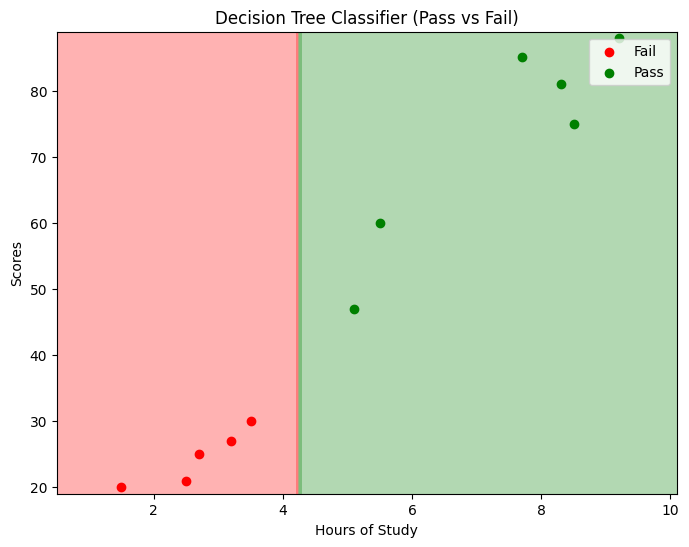

In [14]:
plt.figure(figsize=(8,6))
plt.contourf(
    X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha = 0.3, cmap = ListedColormap(('red', 'green'))
)
plt.scatter(X_set[y_set == 0, 0], X_set[y_set == 0, 1], c='red', label='Fail')
plt.scatter(X_set[y_set == 1, 0], X_set[y_set == 1, 1], c='green', label='Pass')
plt.title('Decision Tree Classifier (Pass vs Fail)')
plt.xlabel('Hours of Study')
plt.ylabel('Scores')
plt.legend()
plt.show()

# 8. Predict for new student

In [15]:
new_student = np.array([[9.25, 85]])
pred = clf.predict(new_student)[0]
result = 'Pass' if pred == 1 else 'Fail'
print(f"\nPrediction for student (Hours=9.25, Score=85): {result}")


Prediction for student (Hours=9.25, Score=85): Pass


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# 9. Visualize the tree

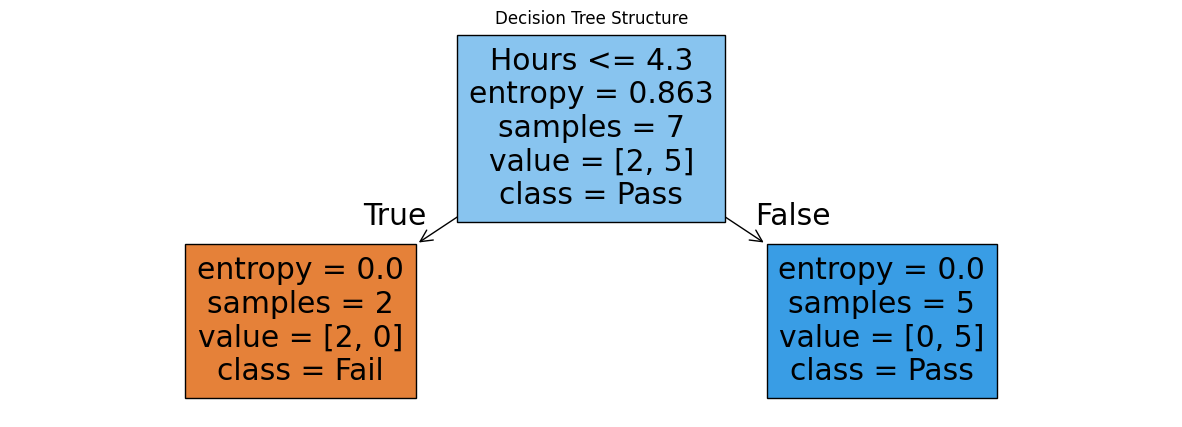

In [20]:
plt.figure(figsize=(15,5))
plot_tree(clf, feature_names=['Hours','Scores'], class_names=['Fail','Pass'], filled=True)
plt.title("Decision Tree Structure")
plt.show()